## 本章导读
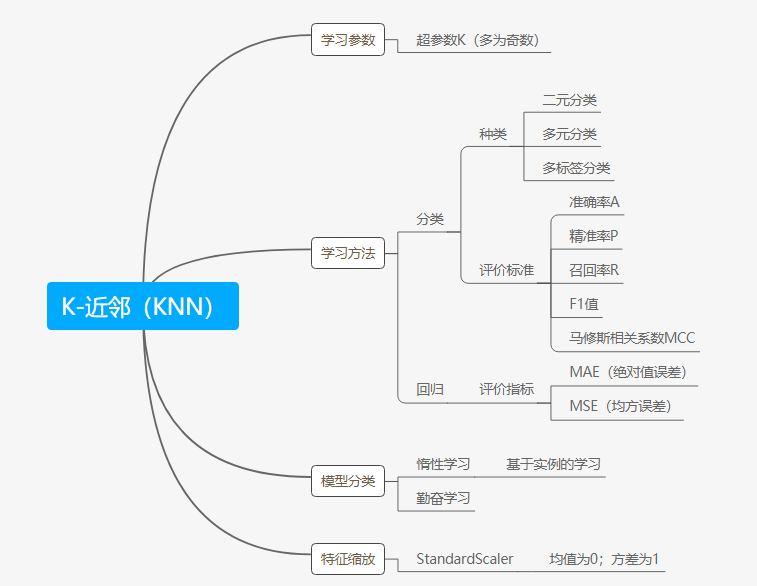

## 3.1 K-近邻模型
`KNN模型`是一种用于回归任务和分类任务的简单模型。它是如此简单以至于可以顾名思义地猜测出其算法原理。算法中的“邻居”代表的是度量空间中的训练实例。度量空间是定义了集合中所有成员之间距离的特征空间。在前一章的披萨问题中，由于我们定义了所有披萨直径之间的距离，因此所有的训练实例都可以在一个度量空间中表示。邻居用于估计一个测试实例对应的响应变量值。`超参k`用来指定估计过程应该包含多少个邻居。超参是用来控制算法如何学习的参数，它不通过训练数据来估计，一般需要人为指定。最后，算法通过某种距离函数，从度量空间中选出k个距离测试实例最近的邻居。

对于分类任务，训练集由一组特征向量的元组和标签类组成。 KNN算法可用于`二元分类`、`多元分类`以及`多标签分类`任务，在后面的内容中我们将分别介绍这些任务，本章内容只关注二元分类任务。最简单的 KNN 分类器使用 KNN 标签模式对测试实例进行分类，但是我们也可以使用其他策略。超参 k 经常设置为一个**奇数**来防止出现平局现象。在回归任务中，每一个特征向量都会和一个响应变量相关联，此处的响应变量是一个实值标量而不是一个标签，预测结果为 KNN 响应变量的均值或者权重均值。

## 3.2 惰性学习和非参数模型

KNN 是一种惰性学习模型。`惰性学习模型`，也被称为`基于实例的学习模型`，会对训练数据集进行少量的处理或者完全不处理。和简单线性回归这样的勤奋学习模型不同， KNN在训练阶段不会估计由模型生成的参数。惰性学习有利有弊。*训练勤奋学习模型通常很耗费计算资源，但是在模型预测阶段代价并不昂贵*。例如在简单线性回归中，预测阶段只需要将特征乘以系数，再加上截断参数即可。惰性学习模型几乎可以进行即刻预测，但是需要付出高昂的代价。在 KNN 模型最简单的实现中，进行预测要求计算出一个测试实例和所有训练实例之间的距离。

和我们将要讨论的其他模型不同， KNN 是一种`非参数模型`。 参数模型使用固定数量的参数或者系数去定义能够对数据进行总结的模型，参数的数量独立于训练实例的数量。非参数模型从字面上看似乎是个误称，因为它并不意味着模型不需要参数。相反，**非参数模型意味着模型的参数个数并不固定，它可能随着训练实例数量的增加而增加**。

当训练数据数量庞大，同时你对响应变量和解释变量之间的关系所知甚少时，非参数模型会非常有用。 KNN 模型只基于一个`假设`：**互相接近的实例拥有类似的响应变量值**。非参数模型提供的灵活性并不总是可取的，当训练数据很缺乏或者你对响应变量和解释变量之间的关系有所了解时，对响应变量和解释变量之间关系做假设的模型就很有用。

## 3.3 KNN 模型分类
回顾一下，在第 1 章中定义了分类任务的目标是使用一个或多个特征去预测一个离散响应变量的值。下面我们来看一个玩具分类问题。假设你需要使用一个人的身高和体重去预测性别。由于响应变量只能从两个标签中二选一，因此这个问题称为二元分类。表 3.1中记录了 9 个实例。

|  身高  | 体重 | 标签 |
| ----- | ---- | ---- |
| 158cm | 64kg | 男性 |
| 170cm | 86kg | 男性 |
| 183cm | 84kg | 男性 |
| 191cm | 80kg | 男性 |
| 155cm | 49kg | 女性 |
| 163cm | 59kg | 女性 |
| 170cm | 67kg | 女性 |
| 158cm | 54kg | 女性 |
| 180cm | 67kg | 女性 |

和上一章中的简单线性回归问题不同，此处我们使用两个解释变量特征预测响应变量值。 KNN 并不仅限于两个特征的情形， KNN 算法可以使用任意数量的特征，但是特征数量多于3时将无法进行可视化。我们使用 matplotlib 类库绘制散点图将训练数据可视化，到图 3.1，如代码 3.1 所示。

In [1]:
import numpy as np
from matplotlib import pyplot as plt

X_train = np.array([[158,64],
[170,86],
[183,84],
[191,80],
[155,49],
[163,59],
[180,67],
[158,54],
[170,67],
])

y_train = np.array([["M"],
["M"],
["M"],
["M"],
["F"],
["F"],
["F"],
["F"],
["F"],])

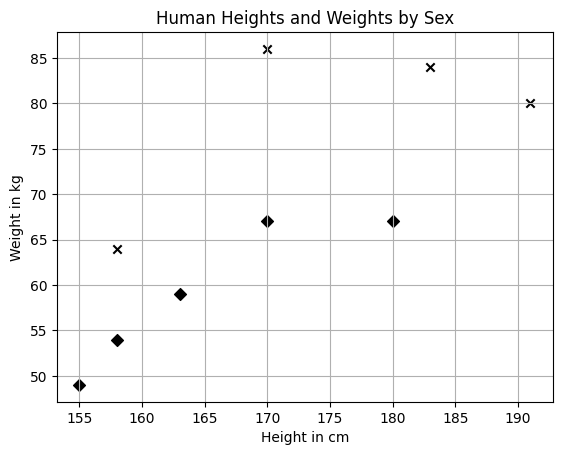

In [2]:
plt.figure()
plt.title('Human Heights and Weights by Sex')
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')
plt.grid(True)

for i, x in enumerate(X_train):
    plt.scatter(x[0], x[1], c='k', marker='x' if y_train[i][0]=="M" else 'D')

plt.show()

从图 3.1 中我们可以看出，用`×`标记表示男性，用`◆`标记表示女性，可见男性的整体趋势比女性更高更重，这与我们的日常经验一致。现在有一个已知身高体重的人，让我们使用 KNN 来预测其性别。假设预测对象的身高155厘米，体重70千克。首先我们需要定义距离衡量方法，在此我们使用欧几里得距离，即在一个欧几里得空间中两点之间的直线距离。二维空间中的欧几里得距离计算如公式 3.1 所示：

$$
d(p, q) = d(q, p) = \sqrt{(q_1 - p_1)^2 + (q_2 - p_2)^2}
$$

接下来，计算测试实例和所有训练实例之间的距离。

In [3]:
X = np.array([[155, 70]])
distance = np.sqrt(np.sum((X_train - X)** 2, axis=1))
print(distance)

[ 6.70820393 21.9317122  31.30495168 37.36308338 21.         13.60147051
 25.17935662 16.2788206  15.29705854]


In [4]:
nearest_neighbor_indices = distance.argsort()[:3]
nearest_neighbor_genders = np.take(y_train, nearest_neighbor_indices)
print(nearest_neighbor_genders)

['M' 'F' 'F']


In [5]:
from collections import Counter
b = Counter(np.take(y_train, distance.argsort()[:3]))
b.most_common(1)[0][0]

'F'

图 3.2 中用圆形标明测试实例，用放大的标记来标明最近的 3 个邻居：

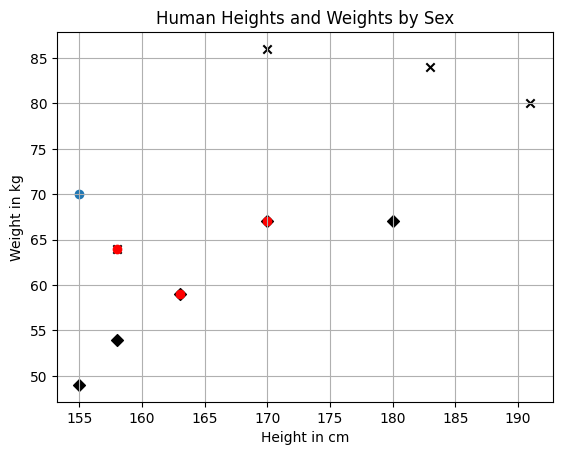

In [6]:
plt.figure()
plt.title('Human Heights and Weights by Sex')
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')
plt.grid(True)

for i, x in enumerate(X_train):
    plt.scatter(x[0], x[1], c='k', marker='x' if y_train[i][0]=="M" else 'D')

nearest_neighbors = np.take(X_train, nearest_neighbor_indices, axis=0)
plt.scatter(nearest_neighbors[:, 0], nearest_neighbors[:, 1], c='red')
plt.scatter(X[:, 0], X[:, 1])

plt.show()

根据图 3.2 可以见得，两个邻居为女性， 1 个邻居为男性，因此预测测试实例为女性。现在使用 scikit-learn 类库实现一个 KNN 分类器，如代码 3.3 所示。

In [7]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.neighbors import KNeighborsClassifier

lb = LabelBinarizer()
y_train_binarized = lb.fit_transform(np.array(y_train))
y_train_binarized

array([[1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0]])

In [8]:
K = 3

clf = KNeighborsClassifier(n_neighbors=K)
clf.fit(X_train, y_train_binarized.reshape(-1))
pred_binarized = clf.predict(X)
# 返回成字符串模式
pred_label = lb.inverse_transform(pred_binarized)
print(pred_label)

['F']


我们的标签是字符串，因此首先使用`LabelBinarizer`将其转换为数。`LabelBinarizer`类实现了转换器接口，其中包含`fit`、`transform`和`fit_transform`方法。`fit`方法进行了一些转换准备工作，在此处是将标签字符串映射到整数，`transform`方法则是将映射关系运用于输入标签。`fit_transform`方法同时调用了`fit`和`transform`方法，使用起来非常方便。转换器只应该在训练数据集上进行拟合，分别对训练数据集和测试数据集进行拟合转换，会导致标签到整数映射不一致的情况。在上面的例子中，男性标签在训练数据集中映射为1，在测试数据集中映射为0。一些转换器会将测试数据集的信息泄露到模型中，因此应该避免对全部数据集做拟合。此优势不存在于生产环境中，因此对测试数据集的性能进行衡量可能会比较乐观。我们将在讲到从文本中提取特征的部分时更多地讨论该问题。

接着，我们将`KNeighborsClassifier`类实例化。尽管KNN是一种惰性学习模型，它依然实现了估计器接口。正如在简单线性回归模型中所做的一样，我们调用了`fit`和`predict`方法。最后，我们使用已经完成拟合的`LabelBinarizer`进行逆向转换返回字符串标签。如表3.3所示，现在使用我们的分类器对一个测试数据集进行预测，同时对分类器的性能进行评估，如代码3.4所示。

|  身高  | 体重 | 标签 |
| ----- | ---- | ---- |
| 168cm | 65kg | 男性 |
| 180cm | 96kg | 男性 |
| 160cm | 52kg | 女性 |
| 169cm | 67kg | 女性 |

In [9]:
X_test = np.array([[168,65],
[180,96],
[160,52],
[169,67],])
y_test = ['M', 'M', 'F', 'F']

In [10]:
y_test_binarized = lb.transform(y_test)
y_test_binarized

array([[1],
       [1],
       [0],
       [0]])

In [11]:
clf.predict(X_test)
y_pred_binarized = clf.predict(X_test)
y_pred_binarized

array([0, 1, 0, 0])

对比测试数据集标签拟合分类器的预测标签，我们发现其中一个男性测试实例被错误地预测为女性。回顾第1章，二元分类任务中有两种错误类型：误报和漏报。有很多性能衡量方法可以用于分类器，根据具体应用中出现的错误类型，其中的一些方法会更加适用。我们将使用几种常见的性能衡量方法来评估分类器，包括`准确率`、`精准率`和`召回率`。准确率是测试实例中正确分类的比率。如代码3.5所示，我们的模型对4个实例中的一个分类错误，因此准确率为75%。

In [12]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test_binarized, y_pred_binarized)

0.75

`精准率`是为正向类测试实例被预测为正向类的比率。在这个例子中，正向类为男性。将男性和女性分配为正向类和负向类是随机的，反过来也可以。如代码3.6所示，我们的分类器预测一个测试实例为正向类，这个实例实际也是正向类，因此分类器的精准率为100%。

In [13]:
from sklearn.metrics import precision_score
precision_score(y_test_binarized, y_pred_binarized)

1.0

`召回率`是真实为正向类的测试实例被预测为正向类的比率。如代码3.7所示，我们的分类器将两个真实为正向类的测试实例预测为正向类，因此召回率为50%。

In [14]:
from sklearn.metrics import recall_score
recall_score(y_test_binarized, y_pred_binarized)

0.5

有时用一个统计变量来总结精准率和召回率很有用，这个统计变量称为`F1`得分或者`F1`度量。如代码3.8所示，`F1`得分是精准率和召回率的调和平均值。

In [15]:
from sklearn.metrics import f1_score
f1_score(y_test_binarized, y_pred_binarized)

0.6666666666666666

注意精准率和召回率的算术平均值是F1得分的上界。当分类器的精准率和召回率之间的差异增加时，F1得分对分类器的惩罚程度也会增加。如代码3.9所示，`马修斯相关系数`（MCC）是除F1得分以外，另一种对二元分类器性能进行衡量的选择。一个完美分类器的MCC值为1，随机进行预测的分类器MCC的得分为0，完全预测错误的分类器MCC得分为−1。即使当测试数据集的类别比例非常不平衡时，MCC得分也非常有用。

In [16]:
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(y_test_binarized, y_pred_binarized)

0.5773502691896258

scikit-learn类还提供了一个非常有用的函数`classification_report`用于生成精
准率、召回率和F1得分，如代码3.10所示。

In [17]:
from sklearn.metrics import classification_report
print(classification_report(y_test_binarized, y_pred_binarized))

              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      0.50      0.67         2

    accuracy                           0.75         4
   macro avg       0.83      0.75      0.73         4
weighted avg       0.83      0.75      0.73         4



In [18]:
print(classification_report(y_test_binarized, y_pred_binarized, target_names=['M'], labels=[1]))

              precision    recall  f1-score   support

           M       1.00      0.50      0.67         2

   micro avg       1.00      0.50      0.67         2
   macro avg       1.00      0.50      0.67         2
weighted avg       1.00      0.50      0.67         2



## 3.4 KNN 模型回归

现在我们用KNN模型进行一个回归任务，我们需要使用一个人的身高和性别来预测其体重。表3.4和表3.5分别列出了训练数据和测试数据。

我们将对`KNeighborsRegressor`类进行实例化和拟合，并使用它来预测体重。在这个数据集中，性别已经编码为二元值特征。注意该特征的取值范围是0～1，而表示身高的特征取值范围是155～191。我们将在下一部分中讨论为什么这样的取值范围设定会导致问题，以及如何对其改善。在披萨价格问题中，我们使用确定系数来衡量模型的性能。如代码3.11所示，我们将再次使用它来衡量回归模型，并引入两个用于衡量回归任务性能的新指标—`平均绝对误差`（MAE）和`均方误差`（MSE）

In [19]:
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [20]:
X_train = np.array([
[158, 1],
[170, 1],
[183, 1],
[191, 1],
[155, 0],
[163, 0],
[180, 0],
[158, 0],
[170, 0],
])

y_train = [64, 86, 84, 80, 49, 59, 67, 54, 67]

X_test = np.array([
[168, 1],
[180, 1],
[160, 0],
[169, 0],
])

y_test = [65, 96, 52, 67]

K = 3

In [21]:
regr = KNeighborsRegressor(n_neighbors=K)
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
y_pred

array([70.66666667, 79.        , 59.        , 70.66666667])

In [22]:
mean_absolute_error(y_test, y_pred)

8.333333333333336

In [23]:
mean_squared_error(y_test, y_pred)

95.8888888888889

`MAE`是预测结果误差绝对值的均值。 MAE的计算方法如公式 3.2 所示：

$$
MAE = \frac{1}{n}\sum_{i=0}^{n-1}|y_i-\hat y_i|
$$

`MSE`又被称为均方偏差（均方偏差），比起平均绝对误差来说是一种更常用的指标。如公式 3.3 所示，MSE是预测结果误差平方的均值：

$$
MAE = \frac{1}{n}\sum_{i=0}^{n-1}(y_i-\hat y_i)^2
$$

对于回归模型性能衡量指标来说，忽略误差的方向非常重要，否则一个回归模型中正负方向的误差将会相互抵消。 MSE 和 MAE 分别通过对误差求平方和求绝对值避免了这个问题。对一个较大的误差值求平方会加大它对整体误差的贡献比例，因此 MSE 比 MAE 对于异常值的惩罚程度要高。该特性对于一些问题来说非常有用。由于 MSE 具有非常有用的数学特性，它通常是性能衡量指标当仁不让的首选。注意在普通的线性回归问题中，例如上一章中的简单线性回归问题，我们是对 MSE 的平方根求极小值。

## 3.5 特征缩放
当特征有相同的取值范围时，许多学习算法将会运行得更好。在上一部分中，我们使用了两个特征：一个二元值特征表示性别，另一个连续值特征表示单位为厘米的身高。考虑有一个数据集，该数据集包含身高170厘米的男性和身高160cm的女性。

数据集中的哪个实例更接近身高164cm的男性呢？对身高预测问题来说，我们可能相信测试实例更接近男性实例，因为对预测体重来说，性别差异可能会比6cm的身高差距更重要。但是如果我们以毫米为单位表示身高，测试实例更接近于身高1600mm的女性。如果我们以米为单位表示身高，测试实例更接近于身高1.7m的男性。如代码3.12所示，如果我们以微米为单位表示身高，身高特征对距离函数结果的贡献将会大大增加。

In [24]:
from scipy.spatial.distance import euclidean

X_train_large = np.array([
[1700, 1],
[1600, 0]
])

X_test_large = np.array([1640, 1])

In [25]:
print(euclidean(X_train_large[0, :], X_test_large))
print(euclidean(X_train_large[1, :], X_test_large))

60.0
40.01249804748511


In [26]:
X_train_small = np.array([
[1.7, 1],
[1.6, 0]
])

X_test_small = np.array([1.64, 1])

In [27]:
print(euclidean(X_train_small[0, :], X_test_small))
print(euclidean(X_train_small[1, :], X_test_small))

0.06000000000000005
1.0007996802557444


scikit-learn类库中的`StandardScaler`类是一个用于特征缩放的转换器，它能确保所有的特征都有单位方差。它首先将所有实例特征值减去均值来将其居中。其次将每个实例特征值除以特征的标准差对其进行缩放。均值为0，方差为1的数据称为标准化数据。像~一样，`StandardScaler`类实现了特征缩放转换接口。如代码3.13所示，我们来将上面的回归问题特征做标准化处理，再次拟合并比较前后两个模型的性能。

In [28]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

In [29]:
X_train_scaled

array([[-0.9908706 ,  1.11803399],
       [ 0.01869567,  1.11803399],
       [ 1.11239246,  1.11803399],
       [ 1.78543664,  1.11803399],
       [-1.24326216, -0.89442719],
       [-0.57021798, -0.89442719],
       [ 0.86000089, -0.89442719],
       [-0.9908706 , -0.89442719],
       [ 0.01869567, -0.89442719]])

In [30]:
regr.fit(X_train_scaled, y_train)
y_test_scaled = regr.predict(X_test_scaled)
y_test_scaled

array([78.        , 83.33333333, 54.        , 64.33333333])

In [31]:
r2_score(y_test, y_test_scaled)

0.6706425961745109

In [32]:
mean_absolute_error(y_test, y_test_scaled)

7.583333333333336

In [33]:
mean_squared_error(y_test, y_test_scaled)

85.13888888888893

我们的模型在标准化数据上性能表现更佳。表示性别的特征对实例之间的距离计算贡献更大，这让模型能做出更好的预测。

## 3.5 小结
在本章中，我们介绍了KNN模型，它是一种可以用于分类任务和回归任务的简单而强大的模型。KNN是一种惰性学习模型和非参数模型。KNN模型不会从训练数据中估计固定数量的模型参数，它会将所有训练实例存储起来，并使用离测试实例最近的实例去预测响应变量。我们解决了一个玩具分类问题和一个回归问题，同时还介绍了scikit-learn类库中的转换器接口。我们用`LabelBinarizer`类将字符串标签转换为二元标签，用`StandardScaler`类将特征标准化。

在下一章中，我们将讨论从分类变量、文本以及图片中提取特征的技术，这些方法能让我们将KNN模型运用到更多现实世界的问题中。